In [1]:

import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling



import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.utils import shuffle



from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error


2023-03-15 12:24:08.748971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 12:24:08.843481: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-15 12:24:08.845923: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 12:24:08.845932: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#reading the dataset
df = pd.read_csv('10_data_trimed_attack_noAttack.csv')

def read_dataset():
    #print
    X = df[df.columns[0:42]].values
    y = df[df.columns[41]]
    
    
    #encode the dependant variable
    Y = one_hot_encode(y)
    print(X.shape)
    print(Y.shape)
    return(X,Y)

#define one-hot-encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

#Read the dataset
X, Y = read_dataset()



(494020, 42)
(494020, 2)


In [3]:
#shufffle the dataset to mix up the rows
X,Y = shuffle(X, Y,random_state = 1)

#dataset into train & test 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state=415)

#shapes of the training and testing
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(395216, 42)
(395216, 2)
(98804, 42)
(98804, 2)


In [4]:
#define the important parameters and variables to work with the tensors
learning_rate = 0.4
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "model"



n_dim 42


In [5]:
#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 20
n_hidden_2 = 20
n_hidden_3 = 20

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

y_


<tf.Tensor 'Placeholder_1:0' shape=(?, 2) dtype=float32>

In [6]:
#define the model

def attack_finder(x, weights, biases):
    
    #RELU activation function
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
    layer_1 = tf.nn.relu(layer_1)
    
    #sigmoid activation function
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
    layer_2 = tf.nn.sigmoid(layer_2)
     
    #softmax activation function
    layer_3 = tf.add(tf.matmul(layer_2, weights["h3"]), biases["b3"])
    layer_3 = tf.nn.softmax(layer_3)
    
    #outer layer relu activation function
    out_layer = tf.add(tf.matmul(layer_3, weights["out"]), biases["out"])
    out_layer = tf.nn.softmax(out_layer)
    
    return out_layer
    
    


In [7]:
#Define the weights and biases for each layer

weights = {
    "h1" : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2" : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3" : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "out" : tf.Variable(tf.truncated_normal([n_hidden_3, n_class]))
}
biases = {
    "b1" : tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2" : tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3" : tf.Variable(tf.truncated_normal([n_hidden_3])),
    "out" : tf.Variable(tf.truncated_normal([n_class]))
}
    


In [8]:
# Initialize all the variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()



In [9]:
#call your model defined
y = attack_finder(x, weights, biases)

print(y_.shape)

(?, 2)


In [10]:
#define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

#training_step = tf.train.GradientDescentOptimizer(learning_rate)

In [11]:
sess = tf.Session()
sess.run(init)


2023-03-15 12:24:10.525313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 12:24:10.525432: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-15 12:24:10.525464: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-15 12:24:10.525488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-15 12:24:10.525512: W tensorflow/c

In [12]:
#calculate the cost and accuracy for each epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    #print 
    
    pred_y = sess.run(y, feed_dict ={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print("epoch : ", epoch, "-", "cost: ", cost, "- MSE: ", mse_, "- train Accuracy: ", accuracy)
    
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)



epoch :  0 - cost:  0.5214029 - MSE:  0.15776696296698817 - train Accuracy:  0.8033961
epoch :  1 - cost:  0.51998764 - MSE:  0.15778381782362097 - train Accuracy:  0.8033961
epoch :  2 - cost:  0.51868135 - MSE:  0.15780534570955537 - train Accuracy:  0.8033961
epoch :  3 - cost:  0.51756436 - MSE:  0.1578475729869773 - train Accuracy:  0.8033961
epoch :  4 - cost:  0.51646507 - MSE:  0.1578867772891467 - train Accuracy:  0.8033961
epoch :  5 - cost:  0.5154865 - MSE:  0.15791964303164358 - train Accuracy:  0.8033961
epoch :  6 - cost:  0.5146182 - MSE:  0.15796240838359968 - train Accuracy:  0.8033961
epoch :  7 - cost:  0.5137662 - MSE:  0.1579921014810987 - train Accuracy:  0.8033961
epoch :  8 - cost:  0.51294327 - MSE:  0.15801989153668808 - train Accuracy:  0.8033961
epoch :  9 - cost:  0.5121948 - MSE:  0.15802976747842085 - train Accuracy:  0.8033961
epoch :  10 - cost:  0.51148254 - MSE:  0.15802885656307303 - train Accuracy:  0.8033961
epoch :  11 - cost:  0.510846 - MSE:  0

epoch :  93 - cost:  0.44245064 - MSE:  0.08311309077736195 - train Accuracy:  0.8033961
epoch :  94 - cost:  0.44015926 - MSE:  0.08033887808794629 - train Accuracy:  0.8045221
epoch :  95 - cost:  0.43721163 - MSE:  0.07690482250407889 - train Accuracy:  0.8047903
epoch :  96 - cost:  0.4342061 - MSE:  0.0736780657588765 - train Accuracy:  0.8050914
epoch :  97 - cost:  0.43069604 - MSE:  0.0697442267955609 - train Accuracy:  0.82023245
epoch :  98 - cost:  0.42885298 - MSE:  0.06774690430758637 - train Accuracy:  0.87462044
epoch :  99 - cost:  0.42704484 - MSE:  0.06580288745484458 - train Accuracy:  0.8930686
epoch :  100 - cost:  0.42526522 - MSE:  0.06389930922197726 - train Accuracy:  0.9007454
epoch :  101 - cost:  0.4235168 - MSE:  0.062059656223957316 - train Accuracy:  0.90452814
epoch :  102 - cost:  0.42178804 - MSE:  0.06025671770807953 - train Accuracy:  0.9063423
epoch :  103 - cost:  0.42007843 - MSE:  0.0584971535739891 - train Accuracy:  0.9065726
epoch :  104 - cos

epoch :  184 - cost:  0.35557178 - MSE:  0.014683381955504246 - train Accuracy:  0.9875435
epoch :  185 - cost:  0.35528642 - MSE:  0.014604200702069777 - train Accuracy:  0.987546
epoch :  186 - cost:  0.35500556 - MSE:  0.01452024130094097 - train Accuracy:  0.9875511
epoch :  187 - cost:  0.35472804 - MSE:  0.014442157423101206 - train Accuracy:  0.9875486
epoch :  188 - cost:  0.35445258 - MSE:  0.01436411793814462 - train Accuracy:  0.9875435
epoch :  189 - cost:  0.3541779 - MSE:  0.014287280720247122 - train Accuracy:  0.98755366
epoch :  190 - cost:  0.3539116 - MSE:  0.014213529244360168 - train Accuracy:  0.9875511
epoch :  191 - cost:  0.35365084 - MSE:  0.014141558298460564 - train Accuracy:  0.9875511
epoch :  192 - cost:  0.35339248 - MSE:  0.014067329048061846 - train Accuracy:  0.98755366
epoch :  193 - cost:  0.3531357 - MSE:  0.013996510965364764 - train Accuracy:  0.98755366
epoch :  194 - cost:  0.35288337 - MSE:  0.013927558941732953 - train Accuracy:  0.98755616
e

epoch :  275 - cost:  0.34051558 - MSE:  0.011486061896505839 - train Accuracy:  0.9878598
epoch :  276 - cost:  0.34043258 - MSE:  0.011478205522638216 - train Accuracy:  0.98786235
epoch :  277 - cost:  0.3403496 - MSE:  0.011469809290103395 - train Accuracy:  0.98786235
epoch :  278 - cost:  0.34026828 - MSE:  0.011462469564619085 - train Accuracy:  0.98786235
epoch :  279 - cost:  0.3401877 - MSE:  0.011454573366403554 - train Accuracy:  0.98786485
epoch :  280 - cost:  0.34010834 - MSE:  0.011447573399775132 - train Accuracy:  0.98786485
epoch :  281 - cost:  0.34002906 - MSE:  0.011439986384470765 - train Accuracy:  0.98786485
epoch :  282 - cost:  0.33995125 - MSE:  0.011433147831422144 - train Accuracy:  0.98786485
epoch :  283 - cost:  0.33987388 - MSE:  0.0114257941411397 - train Accuracy:  0.9878699
epoch :  284 - cost:  0.33979717 - MSE:  0.011419021597028924 - train Accuracy:  0.9878699
epoch :  285 - cost:  0.3397215 - MSE:  0.011411577649154264 - train Accuracy:  0.98786

epoch :  366 - cost:  0.3353806 - MSE:  0.011199350203145208 - train Accuracy:  0.98793066
epoch :  367 - cost:  0.33533654 - MSE:  0.01118685278006769 - train Accuracy:  0.98793066
epoch :  368 - cost:  0.33737952 - MSE:  0.013145113674177701 - train Accuracy:  0.9857723
epoch :  369 - cost:  0.33729288 - MSE:  0.013037927680148604 - train Accuracy:  0.98581535
epoch :  370 - cost:  0.33723465 - MSE:  0.013024866912580202 - train Accuracy:  0.9858255
epoch :  371 - cost:  0.33679673 - MSE:  0.012578884974941584 - train Accuracy:  0.9862708
epoch :  372 - cost:  0.33521053 - MSE:  0.011058853764361299 - train Accuracy:  0.98793316
epoch :  373 - cost:  0.33516115 - MSE:  0.011051350422822502 - train Accuracy:  0.9879585
epoch :  374 - cost:  0.3351205 - MSE:  0.011048121779051744 - train Accuracy:  0.9879559
epoch :  375 - cost:  0.33507925 - MSE:  0.011043496695340018 - train Accuracy:  0.9879559
epoch :  376 - cost:  0.3350382 - MSE:  0.01103806148997178 - train Accuracy:  0.9879534


epoch :  457 - cost:  0.3325536 - MSE:  0.010924250741756392 - train Accuracy:  0.988042
epoch :  458 - cost:  0.33253184 - MSE:  0.010921617300843461 - train Accuracy:  0.9880445
epoch :  459 - cost:  0.33250993 - MSE:  0.010923729531394557 - train Accuracy:  0.98803943
epoch :  460 - cost:  0.33248705 - MSE:  0.010924364267803967 - train Accuracy:  0.98803943
epoch :  461 - cost:  0.33246556 - MSE:  0.010923285955449263 - train Accuracy:  0.9880445
epoch :  462 - cost:  0.33244342 - MSE:  0.010923259701451716 - train Accuracy:  0.988042
epoch :  463 - cost:  0.33242202 - MSE:  0.01091827543906449 - train Accuracy:  0.988042
epoch :  464 - cost:  0.33239973 - MSE:  0.01091955574222052 - train Accuracy:  0.98804706
epoch :  465 - cost:  0.33237848 - MSE:  0.010922603862451039 - train Accuracy:  0.988042
epoch :  466 - cost:  0.33235735 - MSE:  0.010919268504595956 - train Accuracy:  0.98804957
epoch :  467 - cost:  0.3323361 - MSE:  0.010925125886962138 - train Accuracy:  0.988042
epoc

epoch :  548 - cost:  0.33093905 - MSE:  0.010967251249078146 - train Accuracy:  0.9880116
epoch :  549 - cost:  0.33092484 - MSE:  0.010968026067388476 - train Accuracy:  0.9880116
epoch :  550 - cost:  0.33091024 - MSE:  0.010969043315262385 - train Accuracy:  0.98801416
epoch :  551 - cost:  0.33089474 - MSE:  0.01097053515364783 - train Accuracy:  0.9880243
epoch :  552 - cost:  0.33087978 - MSE:  0.010969132875889112 - train Accuracy:  0.9880243
epoch :  553 - cost:  0.33086568 - MSE:  0.010970652022933961 - train Accuracy:  0.98802173
epoch :  554 - cost:  0.3308514 - MSE:  0.010969915027593565 - train Accuracy:  0.9880268
epoch :  555 - cost:  0.33083767 - MSE:  0.01097235949380029 - train Accuracy:  0.9880268
epoch :  556 - cost:  0.33082482 - MSE:  0.010969755221313075 - train Accuracy:  0.98802173
epoch :  557 - cost:  0.33081144 - MSE:  0.01097379721974463 - train Accuracy:  0.9880268
epoch :  558 - cost:  0.33079848 - MSE:  0.010970180410809289 - train Accuracy:  0.98802173

epoch :  639 - cost:  0.3298774 - MSE:  0.011022378042256939 - train Accuracy:  0.98803186
epoch :  640 - cost:  0.32986096 - MSE:  0.01102282094314922 - train Accuracy:  0.9880445
epoch :  641 - cost:  0.32985413 - MSE:  0.011022446338263232 - train Accuracy:  0.98803437
epoch :  642 - cost:  0.32984686 - MSE:  0.011022953005816672 - train Accuracy:  0.98803437
epoch :  643 - cost:  0.3298304 - MSE:  0.011024438632079258 - train Accuracy:  0.98804706
epoch :  644 - cost:  0.32982388 - MSE:  0.011024815013400446 - train Accuracy:  0.98803943
epoch :  645 - cost:  0.32981548 - MSE:  0.011025605876292194 - train Accuracy:  0.98803186
epoch :  646 - cost:  0.32981363 - MSE:  0.01103268061836824 - train Accuracy:  0.98803437
epoch :  647 - cost:  0.32980046 - MSE:  0.011028409856208985 - train Accuracy:  0.98803693
epoch :  648 - cost:  0.32978362 - MSE:  0.011029299256984601 - train Accuracy:  0.988042
epoch :  649 - cost:  0.329775 - MSE:  0.011029074925475073 - train Accuracy:  0.988044

epoch :  730 - cost:  0.32911298 - MSE:  0.011070732718216375 - train Accuracy:  0.98806477
epoch :  731 - cost:  0.32910618 - MSE:  0.011066285921856574 - train Accuracy:  0.98805463
epoch :  732 - cost:  0.32910135 - MSE:  0.011072813214841866 - train Accuracy:  0.98806477
epoch :  733 - cost:  0.32909223 - MSE:  0.011072783444567287 - train Accuracy:  0.98806727
epoch :  734 - cost:  0.32908353 - MSE:  0.011067272260581558 - train Accuracy:  0.98806727
epoch :  735 - cost:  0.32907945 - MSE:  0.01107366566198837 - train Accuracy:  0.98806727
epoch :  736 - cost:  0.3290692 - MSE:  0.01107304470433136 - train Accuracy:  0.98806727
epoch :  737 - cost:  0.32906154 - MSE:  0.011068904975331641 - train Accuracy:  0.98806983
epoch :  738 - cost:  0.32905793 - MSE:  0.011074308071393167 - train Accuracy:  0.98806727
epoch :  739 - cost:  0.32904926 - MSE:  0.01107490648091138 - train Accuracy:  0.98806983
epoch :  740 - cost:  0.32904077 - MSE:  0.0110696086631882 - train Accuracy:  0.988

epoch :  821 - cost:  0.3285395 - MSE:  0.011084536615648422 - train Accuracy:  0.9881002
epoch :  822 - cost:  0.328535 - MSE:  0.011092724008441503 - train Accuracy:  0.98810273
epoch :  823 - cost:  0.32852602 - MSE:  0.011088470629011637 - train Accuracy:  0.98810524
epoch :  824 - cost:  0.32852507 - MSE:  0.01108549807772946 - train Accuracy:  0.9880926
epoch :  825 - cost:  0.3285212 - MSE:  0.011094631311143872 - train Accuracy:  0.9881002
epoch :  826 - cost:  0.32851106 - MSE:  0.011090593924951597 - train Accuracy:  0.98810273
epoch :  827 - cost:  0.32850745 - MSE:  0.011086380772413909 - train Accuracy:  0.9881002
epoch :  828 - cost:  0.328503 - MSE:  0.011094512234783869 - train Accuracy:  0.98810273
epoch :  829 - cost:  0.32849362 - MSE:  0.01109009860841231 - train Accuracy:  0.98810524
epoch :  830 - cost:  0.3284901 - MSE:  0.011087400411854778 - train Accuracy:  0.98809767
epoch :  831 - cost:  0.32848617 - MSE:  0.011095189773990852 - train Accuracy:  0.98810524
e

epoch :  912 - cost:  0.32809338 - MSE:  0.011096777127423692 - train Accuracy:  0.9882166
epoch :  913 - cost:  0.3280934 - MSE:  0.011100662401942846 - train Accuracy:  0.9882014
epoch :  914 - cost:  0.32808754 - MSE:  0.011094823495580301 - train Accuracy:  0.98820394
epoch :  915 - cost:  0.32808512 - MSE:  0.011100200920798399 - train Accuracy:  0.9881989
epoch :  916 - cost:  0.32808435 - MSE:  0.011107850876064225 - train Accuracy:  0.9882115
epoch :  917 - cost:  0.32807103 - MSE:  0.011098415300282306 - train Accuracy:  0.9882166
epoch :  918 - cost:  0.32806885 - MSE:  0.011103668223072623 - train Accuracy:  0.988214
epoch :  919 - cost:  0.32806846 - MSE:  0.011100399602856284 - train Accuracy:  0.9881989
epoch :  920 - cost:  0.32806325 - MSE:  0.011101238695235265 - train Accuracy:  0.9882014
epoch :  921 - cost:  0.32805556 - MSE:  0.011096682637562541 - train Accuracy:  0.9882115
epoch :  922 - cost:  0.3280561 - MSE:  0.011101071680126598 - train Accuracy:  0.9882014
e

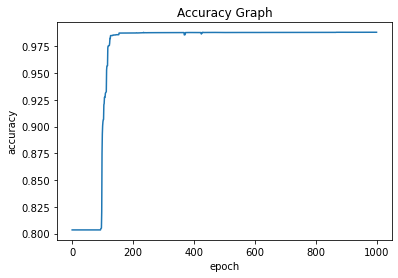

In [13]:
#plot Accuracy Graph
plt.plot(accuracy_history)
plt.title("Accuracy Graph")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()




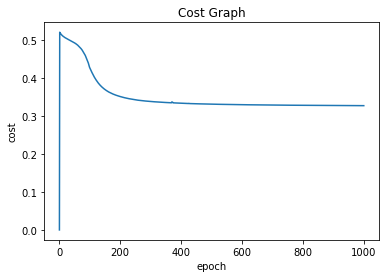

In [14]:
#plot Cost Graph
plt.plot(cost_history)
plt.title("Cost Graph")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()


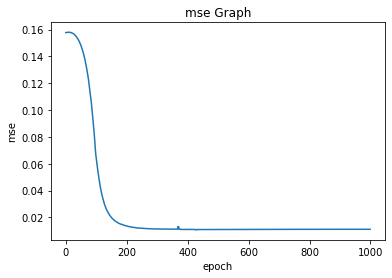

In [15]:
#plot mse Graph
plt.plot(mse_history)
plt.title("mse Graph")
plt.xlabel("epoch")
plt.ylabel("mse")
plt.show()

In [16]:
#print final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print ("test accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
            
                              


test accuracy:  0.98789525


In [17]:
#print the final mean sq error
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y) - test_y)                              
print ("Mse: %.4f" % sess.run(mse)) 

Mse: -0.0068


In [18]:
pred_y

array([[0.00318244, 0.9968176 ],
       [0.00288173, 0.9971182 ],
       [0.97460115, 0.02539891],
       ...,
       [0.00318244, 0.9968176 ],
       [0.00285202, 0.997148  ],
       [0.00318244, 0.9968176 ]], dtype=float32)

In [19]:
test_x

array([[0., 2., 9., ..., 0., 0., 1.],
       [0., 2., 9., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 2., 9., ..., 0., 0., 1.],
       [0., 2., 9., ..., 0., 0., 1.],
       [0., 2., 9., ..., 0., 0., 1.]])

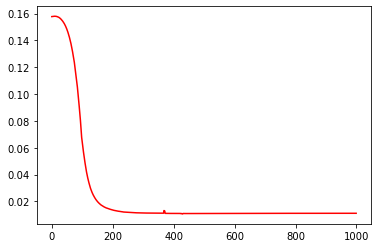

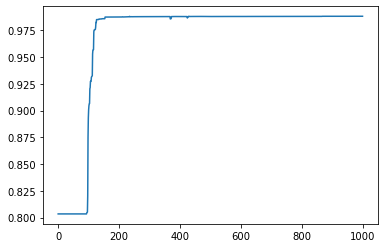

MAE: 0.001
MAE: 0.001


In [20]:
# Plot mse and accuracy graph
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

#Once the model is trained, we can apply cross validation

#Define KFold
kf = KFold(n_splits=2)

#Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

#loop through the KFold splits
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    #fit the model on the training data
    knn.fit(X_train, y_train)
    
    #predict on the test data
    y_pred = knn.predict(X_test)
    
    #calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE: %.3f' % mae)